In [67]:
import requests, json, base64, time
import urllib.parse

In [72]:
stock_data = None
with open('stock_data.json', 'r') as fd:
    stock_data = json.load(fd)
stock_data

[{'language': 'en-US',
  'region': 'US',
  'quoteType': 'EQUITY',
  'typeDisp': 'Equity',
  'quoteSourceName': 'Nasdaq Real Time Price',
  'triggerable': True,
  'customPriceAlertConfidence': 'HIGH',
  'currency': 'USD',
  'exchange': 'NMS',
  'shortName': 'Microsoft Corporation',
  'longName': 'Microsoft Corporation',
  'messageBoardId': 'finmb_21835',
  'exchangeTimezoneName': 'America/New_York',
  'exchangeTimezoneShortName': 'EDT',
  'gmtOffSetMilliseconds': -14400000,
  'market': 'us_market',
  'esgPopulated': False,
  'marketState': 'PRE',
  'firstTradeDateMilliseconds': 511108200000,
  'priceHint': 2,
  'preMarketChange': 14.480011,
  'preMarketChangePercent': 5.3586006,
  'preMarketTime': 1651047164,
  'preMarketPrice': 284.7,
  'regularMarketChange': -10.5,
  'regularMarketChangePercent': -3.7403817,
  'regularMarketTime': 1651003205,
  'regularMarketPrice': 270.22,
  'regularMarketDayHigh': 278.3599,
  'regularMarketDayRange': '270.0 - 278.3599',
  'regularMarketDayLow': 270,

In [73]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):

    image_url = None

    def handle_starttag(self, tag, attrs):
        if self.image_url is not None:
            return
        if tag != 'img': 
            return
        for k,v in attrs:
            if k == 'src2':
                self.image_url = v.replace('&w=42&h=42', '')


In [74]:
def get_symbol_image(search):
    sess = requests.Session()
    sess.cookies['user-agent'] = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.133 Safari/537.36'
    res = sess.get(f'https://www.bing.com/images/search?q={urllib.parse.quote_plus(search)}')
    assert res.status_code == 200

    parser = MyHTMLParser()
    parser.feed(res.text)
    res = sess.get(parser.image_url)
    assert res.status_code == 200
    return res.content
    

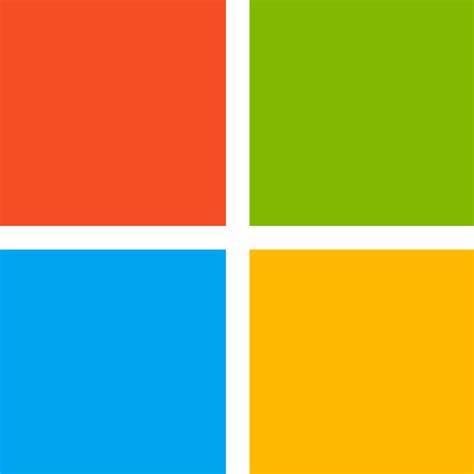

In [82]:
from IPython.display import Image, display


display(Image(data=get_symbol_image('Microsoft logo')))

In [81]:
stock_data = None
with open('stock_data.json', 'r') as fd:
    stock_data = json.load(fd)
stock_data

try:
    for stock in stock_data:
        if 'logo' not in stock:
            print('Scraping logo for', stock["shortName"])
            img = get_symbol_image(f'{stock["shortName"]} logo')
            stock['logo'] = 'data:image/png,base64,' + base64.b64encode(img).decode('utf8')
finally:
    with open('stock_data.json', 'w') as fd:
        json.dump(stock_data, fd)



Scraping logo for AGNC Investment Corp.
Scraping logo for Archer-Daniels-Midland Company
Scraping logo for Teladoc Health, Inc.
Scraping logo for Lockheed Martin Corporation
Scraping logo for Twilio Inc.
Scraping logo for DBS
Scraping logo for Salesforce, Inc.
Scraping logo for Vanguard Information Tech ETF
Scraping logo for Datadog, Inc.
Scraping logo for Riot Blockchain, Inc
Scraping logo for NIFTY 50
